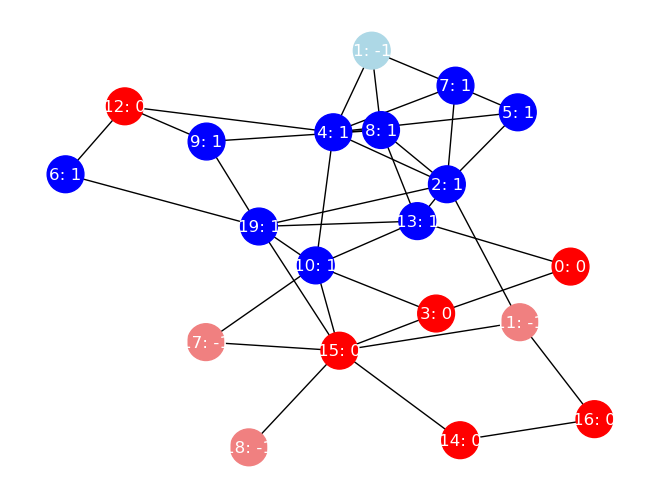

In [32]:
# import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
from sklearn.semi_supervised import LabelPropagation

# Step 1: Define the number of nodes
num_nodes = 20  # This can be adjusted to scale the graph

# Generate labels: some nodes are initially labeled (0 or 1), others are unlabeled (-1)

np.random.seed(0)
labels = -1 * np.ones(num_nodes, dtype=int)  # Start all nodes as unlabeled

labels = np.random.choice([0, 1], num_nodes)  # Randomly assign 0 or 1

num_unlabeled = int(num_nodes * 0.2)  # 20% of the nodes will be labeled
observedlabels = labels.copy()

unlabeled_indices = np.random.choice(num_nodes, num_unlabeled, replace=False)
observedlabels[unlabeled_indices] = - 1

# Step 2: Create a graph and add nodes with attributes
G = nx.Graph()
for i in range(num_nodes):
    G.add_node(i, label=observedlabels[i])

# Adding edges: more likely within the same label, even if some labels are -1
for i in range(num_nodes):
    for j in range(i + 1, num_nodes):
        # Increase likelihood of connecting nodes with the same label
        if np.random.rand() < 0.3 - (0.2 * (labels[i] != labels[j]) ):
            G.add_edge(i, j)

# Step 3: Apply label propagation
adj_matrix = nx.to_numpy_array(G)
label_prop_model = LabelPropagation(kernel='knn', n_neighbors=3)
label_prop_model.fit(adj_matrix, labels)
predicted_labels = label_prop_model.transduction_

# Update node attributes with predicted labels
for i in range(num_nodes):
    G.nodes[i]['predlabel'] = predicted_labels[i]

# Step 4: Visualize the graph
pos = nx.spring_layout(G)
node_colors = []
for i in range(num_nodes):
    if observedlabels[i] == -1:  # For nodes that were originally unlabeled
        if predicted_labels[i] == 0:
            node_colors.append('lightcoral')  # Lighter red for inferred label 0
        else:
            node_colors.append('lightblue')  # Lighter blue for inferred label 1
    else:
        if predicted_labels[i] == 0:
            node_colors.append('red')  # Regular red for original label 0
        else:
            node_colors.append('blue')  # Regular blue for original label 1

labels = {node: f"{node}: {G.nodes[node]['label']}" for node in G.nodes()}
nx.draw(G, pos, node_color=node_colors, labels=labels, with_labels=True, node_size=700, font_color='white')
plt.show()
